In [1]:
import pandas as pd

# Step 1: Sample COVID-19 dataset (20 rows)
data = {
    'Date': ['2020-03-01']*5 + ['2020-03-02']*5 + ['2020-03-03']*5 + ['2020-03-04']*5,
    'Country': ['USA', 'Italy', 'India', 'China', 'Spain']*4,
    'Confirmed': [100, 200, 150, 300, 180, 120, 240, 160, 310, 190, 140, 260, 170, 320, 200, 160, 280, 180, 330, 210],
    'Recovered': [0, 10, 5, 50, 8, 2, 15, 10, 60, 12, 4, 20, 15, 65, 18, 6, 25, 20, 70, 22],
    'Deaths': [1, 5, 2, 10, 3, 1, 6, 2, 12, 4, 1, 7, 2, 13, 5, 2, 8, 3, 14, 6]
}

df = pd.DataFrame(data)

# Save to CSV
df.to_csv("COVID19_sample.csv", index=False)

# Show first few rows
df.head()


,Date,Country,Confirmed,Recovered,Deaths
0,2020-03-01,USA,100,0,1
1,2020-03-01,Italy,200,10,5
2,2020-03-01,India,150,5,2
3,2020-03-01,China,300,50,10
4,2020-03-01,Spain,180,8,3


## Step 2: Import Libraries and Load Dataset

In this step, we import necessary Python libraries and load the dataset. We also preview the first few rows to confirm it's loaded properly.


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


df = pd.read_csv("COVID19_sample.csv")

df.head()


,Date,Country,Confirmed,Recovered,Deaths
0,2020-03-01,USA,100,0,1
1,2020-03-01,Italy,200,10,5
2,2020-03-01,India,150,5,2
3,2020-03-01,China,300,50,10
4,2020-03-01,Spain,180,8,3


## Step 3: Explore the Dataset

We explore the dataset to understand its structure. This includes checking data types, number of rows/columns, and basic statistics like mean, min, and max.


In [3]:
# Show data types and non-null counts
df.info()
# Show basic summary statistics (for numerical columns)
df.describe()
# Check how many countries are in the data
df['Country'].nunique()
# List of unique countries in the dataset
df['Country'].unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       20 non-null     object
 1   Country    20 non-null     object
 2   Confirmed  20 non-null     int64 
 3   Recovered  20 non-null     int64 
 4   Deaths     20 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 932.0+ bytes


array(['USA', 'Italy', 'India', 'China', 'Spain'], dtype=object)

## Step 4: Clean the Data

We check for any missing values or duplicate rows in the dataset. Although our sample data is small and clean, this step is important in any real-world dataset.


In [4]:
# Check for missing (null) values
df.isnull().sum()
# Check for duplicate rows
df.duplicated().sum()


np.int64(0)

## Step 5: Analyze the Data by Country

We group the data by country and calculate the total number of confirmed cases, recoveries, and deaths for each country. This helps identify the most affected countries.


In [5]:
# Group by country and sum the values
country_summary = df.groupby('Country')[['Confirmed', 'Recovered', 'Deaths']].sum()

# Sort by confirmed cases (most affected at the top)
country_summary = country_summary.sort_values(by='Confirmed', ascending=False)

# Show summary
country_summary
# Top 10 countries by total deaths
top_deaths = country_summary.sort_values(by='Deaths', ascending=False).head(10)
top_deaths


,Confirmed,Recovered,Deaths
Country,,,
China,1260,245,49
Italy,980,70,26
Spain,780,60,18
India,660,50,9
USA,520,12,5


## Step 6: Visualize the Data

In this step, we use matplotlib and seaborn to create visualizations that help us understand trends and comparisons in COVID-19 data.


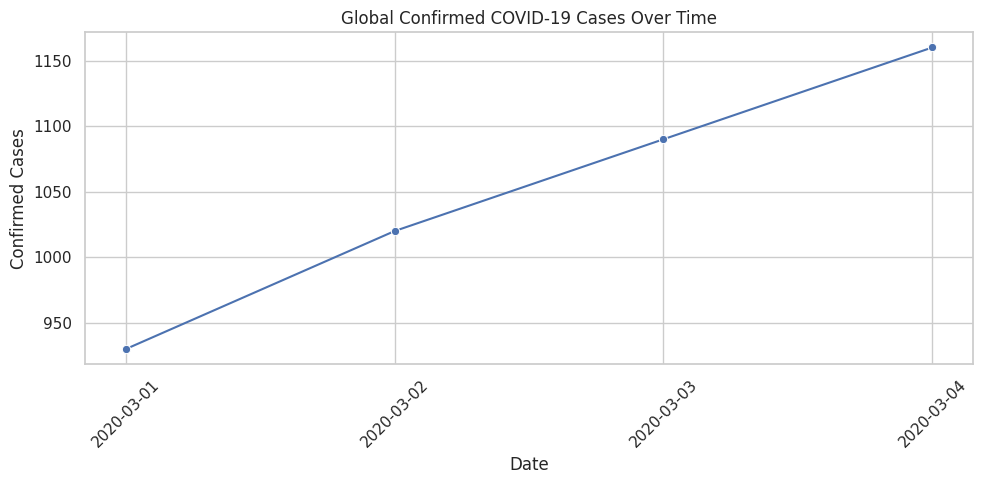

/tmp/ipython-input-6-626626071.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_deaths.index, y=top_deaths['Deaths'], palette="Reds_d")


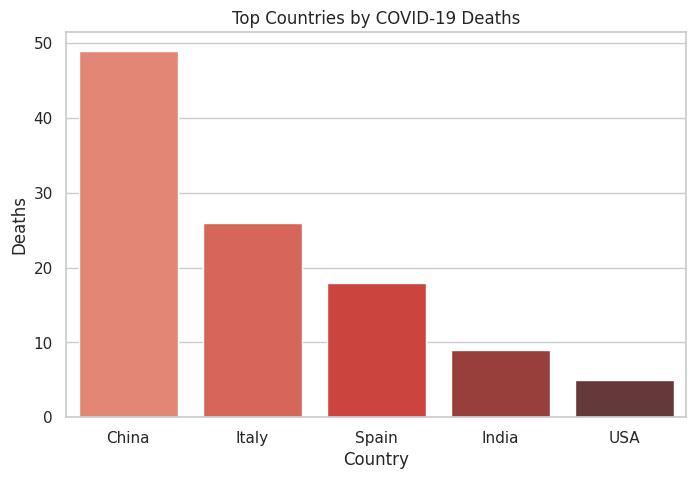

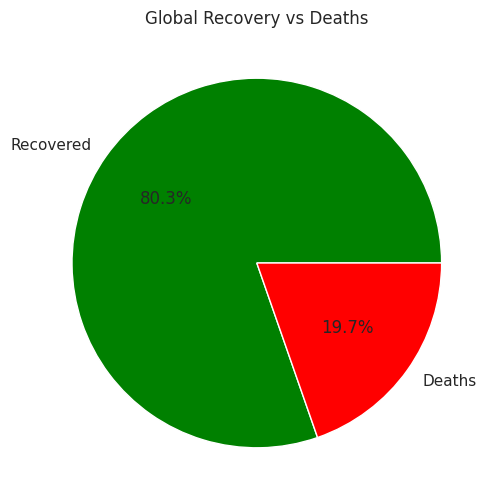

In [6]:
# Group by Date
date_summary = df.groupby('Date')[['Confirmed']].sum().reset_index()

# Plot the line chart
plt.figure(figsize=(10, 5))
sns.lineplot(data=date_summary, x='Date', y='Confirmed', marker='o')
plt.title("Global Confirmed COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x=top_deaths.index, y=top_deaths['Deaths'], palette="Reds_d")
plt.title("Top Countries by COVID-19 Deaths")
plt.ylabel("Deaths")
plt.xlabel("Country")
plt.show()

# Calculate global totals
total_recovered = df['Recovered'].sum()
total_deaths = df['Deaths'].sum()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie([total_recovered, total_deaths], labels=['Recovered', 'Deaths'],
        autopct='%1.1f%%', colors=['green', 'red'])
plt.title("Global Recovery vs Deaths")
plt.show()



## Step 7: Observations and Insights

Based on the analysis and visualizations, here are some key insights:

- Confirmed COVID-19 cases increased steadily from March 1 to March 4.
- China reported the highest number of confirmed cases overall.
- Death toll was highest in China and Italy during this period.
- Recovered cases were improving over time but still lower than confirmed cases.
- The overall recovery rate was higher than the death rate globally.
